In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data(test_split=0.2, seed=85)

In [3]:
X_train[0]

array([  0.95577,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.047  ,
        88.8    ,   4.4534 ,   4.     , 307.     ,  21.     , 306.38   ,
        17.28   ])

In [4]:
X_train.shape

(404, 13)

In [5]:
mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis=0)
X_train /= std
X_test -= mean
X_test /= std

In [6]:
model = tf.keras.models.Sequential()

In [7]:
model.add(tf.keras.layers.Input(shape=(13,)))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [8]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(X_train, y_train, epochs=250, batch_size=64)

Epoch 1/250
7/7 [==============================] - 0s 3ms/step - loss: 548.0552 - mean_absolute_error: 21.5133
Epoch 2/250
7/7 [==============================] - 0s 2ms/step - loss: 521.6471 - mean_absolute_error: 20.9084
Epoch 3/250
7/7 [==============================] - 0s 2ms/step - loss: 500.2900 - mean_absolute_error: 20.4168
Epoch 4/250
7/7 [==============================] - 0s 2ms/step - loss: 479.6082 - mean_absolute_error: 19.9246
Epoch 5/250
7/7 [==============================] - 0s 2ms/step - loss: 459.3214 - mean_absolute_error: 19.4346
Epoch 6/250
7/7 [==============================] - 0s 3ms/step - loss: 439.5608 - mean_absolute_error: 18.9327
Epoch 7/250
7/7 [==============================] - 0s 2ms/step - loss: 419.0214 - mean_absolute_error: 18.4153
Epoch 8/250
7/7 [==============================] - 0s 2ms/step - loss: 398.1374 - mean_absolute_error: 17.8701
Epoch 9/250
7/7 [==============================] - 0s 2ms/step - loss: 376.8204 - mean_absolute_error: 17.3241
E

In [10]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 9.9211 - mean_absolute_error: 2.3700


[9.921112060546875, 2.3699843883514404]

In [17]:
predict = model.predict(X_test)[0][0]
predict

4/4 [==============================] - 0s 2ms/step


45.91638

In [12]:
y_real = y_test[0]
y_real

50.0

In [13]:
print(history.history.keys())

dict_keys(['loss', 'mean_absolute_error'])


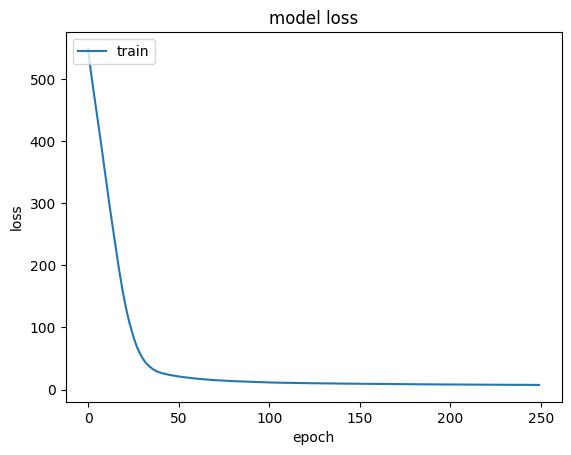

In [15]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

13/13 [==============================] - 0s 1ms/step


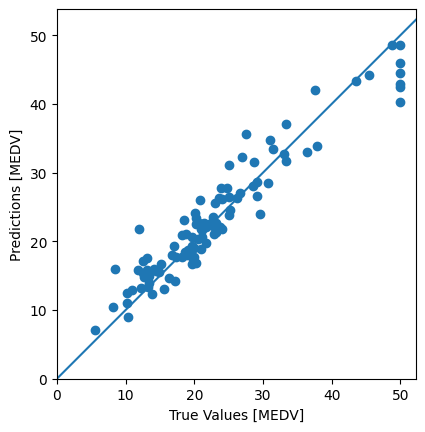

In [16]:
test_predictions = model.predict(X_test).flatten()
train_predictions = model.predict(X_train).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MEDV]')
plt.ylabel('Predictions [MEDV]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])